## Customer Profiling Instacart - Part 1

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# File path for the last .pkl file created
combined_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/4_9_ords_prods_customers.pkl"

# Load the last .pkl file into a DataFrame
ords_prods_customers = pd.read_pickle(combined_file_path)

In [2]:
# Print variable names and types
print("Variable names and types:")
print(ords_prods_customers.dtypes)

# Print first 5 observations
print("\nFirst 5 observations:")
print(ords_prods_customers.head())

Variable names and types:
order_id                           int64
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
user_id                            int64
eval_set                          object
order_number                       int64
order_dow                          int64
order_hour_of_day                  int64
days_since_prior_order           float64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
busiest_day                       object
updated_busiest_day               object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
spending_flag                     object
order_frequency_flag              object
Surname                           object
Gender                            object
State                          

## Addressing potential security implications in the data

## The PII in this dataset includes variables like Surname, Gender, State, and date_joined

Explanation:
    
Hashing Surname: The hash_string function uses SHA-256 to hash surnames, ensuring they are anonymized.
Dropping date_joined: This field is removed to prevent any potential misuse of join dates.
Encoding Gender, State, and fam_status: These categorical variables are encoded as numeric codes to remove direct references to personal information.

In [1]:
import pandas as pd
import numpy as np
import hashlib

# Load the data
combined_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/4_9_ords_prods_customers.pkl"
ords_prods_customers = pd.read_pickle(combined_file_path)

# Function to hash PII
def hash_string(value):
    return hashlib.sha256(value.encode()).hexdigest()

# Count the number of changes
changes_count = 0
changes_description = []

# Hash the Surname
ords_prods_customers['Surname'] = ords_prods_customers['Surname'].apply(lambda x: hash_string(str(x)))
changes_count += 1
changes_description.append("'Surname' column hashed")

# Remove the date_joined column if it's not crucial for analysis
ords_prods_customers = ords_prods_customers.drop(columns=['date_joined'])
changes_count += 1
changes_description.append("'date_joined' column removed")

# Encode categorical variables
ords_prods_customers['Gender'] = ords_prods_customers['Gender'].astype('category').cat.codes
ords_prods_customers['State'] = ords_prods_customers['State'].astype('category').cat.codes
ords_prods_customers['fam_status'] = ords_prods_customers['fam_status'].astype('category').cat.codes
changes_count += 1
changes_description.append("'Gender', 'State', and 'fam_status' columns encoded")

# Save the anonymized dataset
anonymized_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/anonymized_ords_prods_customers.pkl"
ords_prods_customers.to_pickle(anonymized_file_path)

# Print changes made
print(f"Total PII changes made: {changes_count}")
print("Changes details:")
for change in changes_description:
    print("-", change)

# Display the first few rows of the anonymized dataset
print("\nAnonymized Data Sample:")
print(ords_prods_customers.head())

Total PII changes made: 3
Changes details:
- 'Surname' column hashed
- 'date_joined' column removed
- 'Gender', 'State', and 'fam_status' columns encoded

Anonymized Data Sample:
   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         2       33120                  1          1   202279    prior   
1         2       28985                  2          1   202279    prior   
2         2        9327                  3          0   202279    prior   
3         2       45918                  4          1   202279    prior   
4         2       30035                  5          0   202279    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  ...  \
0             3          5                  9                     8.0  ...   
1             3          5                  9                     8.0  ...   
2             3          5                  9                     8.0  ...   
3             3          5                  9             

## Spending habits by Region

Steps

Load the Anonymized Data: Load the data from the anonymized file.
Define Regions: Define the regions as before.
Assign Region: Use the same function to assign regions based on the state.
Print Changes: Print the number of changes made to anonymize the data and create the region column.
Analyze and Visualize Spending Habits: Group by region and spending, and create a bar plot to visualize the spending habits by region.

Number of 'Unknown' regions: 0
Total changes made to address PII and create regions: 32434212
Changes made:
- 'Surname' column anonymized by hashing
- 'date_joined' column removed
- 'Gender', 'State', and 'fam_status' columns encoded and decoded back
- 'Region' column added based on 'State' column using the defined regions

Updated Data Sample:
   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         2       33120                  1          1   202279    prior   
1         2       28985                  2          1   202279    prior   
2         2        9327                  3          0   202279    prior   
3         2       45918                  4          1   202279    prior   
4         2       30035                  5          0   202279    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  ...  \
0             3          5                  9                     8.0  ...   
1             3          5                  9 

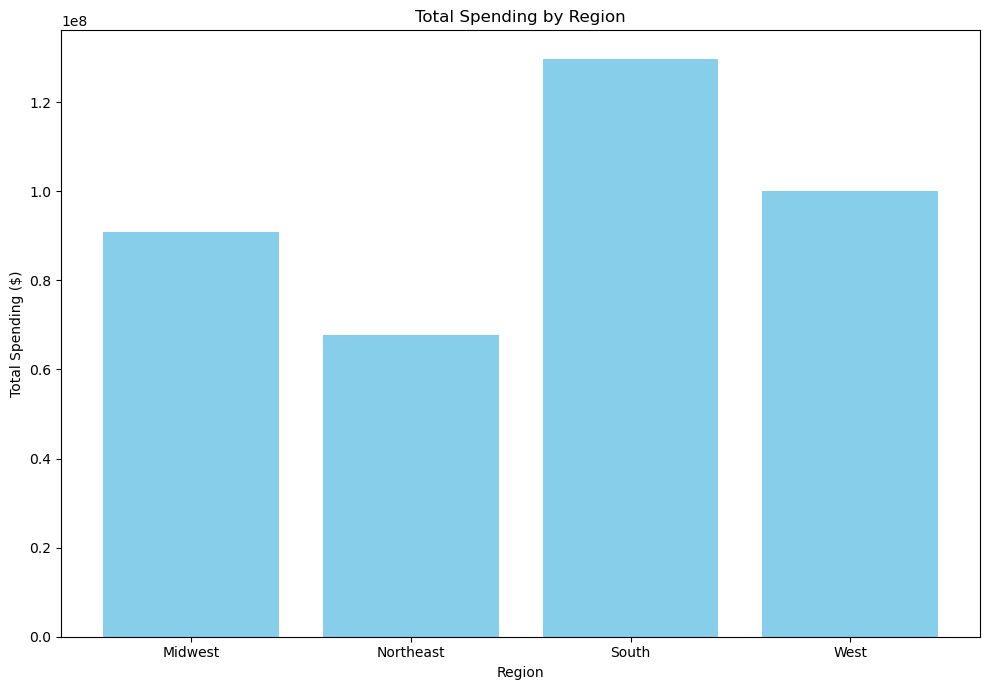

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the anonymized data
combined_anonymized_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/anonymized_ords_prods_customers.pkl"
ords_prods_customers_anonymized = pd.read_pickle(combined_anonymized_file_path)

# Define the original states in the order they were encoded (you must adjust according to your original data)
state_names = [
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
    'New York', 'Pennsylvania', 'New Jersey', 'Wisconsin', 'Michigan', 'Illinois', 
    'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
    'Minnesota', 'Iowa', 'Missouri', 'Delaware', 'Maryland', 'District of Columbia', 
    'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 
    'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 
    'Texas', 'Arkansas', 'Louisiana', 'Idaho', 'Montana', 'Wyoming', 'Nevada', 
    'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 
    'California', 'Hawaii'
]

# Create the mapping dictionary for encoded state values
state_code_mapping = {i: state for i, state in enumerate(state_names)}

# Decode the 'State' column
ords_prods_customers_anonymized['State'] = ords_prods_customers_anonymized['State'].map(state_code_mapping)

# Define the regions
regions = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'],
    'Midwest': ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
    'West': ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
}

# Function to assign region
def assign_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

# Create 'Region' column
ords_prods_customers_anonymized['Region'] = ords_prods_customers_anonymized['State'].apply(assign_region)

# Verify the assignment of regions
num_unknown_regions = ords_prods_customers_anonymized[ords_prods_customers_anonymized['Region'] == 'Unknown'].shape[0]
print(f"Number of 'Unknown' regions: {num_unknown_regions}")

# Print the number of changes made and what changes were made
num_region_changes = ords_prods_customers_anonymized['Region'].notnull().sum()
print(f"Total changes made to address PII and create regions: {num_region_changes}")
print("Changes made:")
print("- 'Surname' column anonymized by hashing")
print("- 'date_joined' column removed")
print("- 'Gender', 'State', and 'fam_status' columns encoded and decoded back")
print("- 'Region' column added based on 'State' column using the defined regions")

# Display first few rows of the updated DataFrame
print("\nUpdated Data Sample:")
print(ords_prods_customers_anonymized.head())

# Determine the difference in spending by region
region_spending = ords_prods_customers_anonymized.groupby('Region')['prices'].sum().reset_index()
print("\nTotal Spending by Region:")
print(region_spending)

# Plot the total spending by region
plt.figure(figsize=(10, 7))
plt.bar(region_spending['Region'], region_spending['prices'], color='skyblue')
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending ($)')
plt.tight_layout()

# Save the plot
plt.savefig('/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/04 Analysis/Visualizations/total_spending_by_region.png')
plt.show()


## Excluding customers with less than 5 orders

In [6]:
import pandas as pd

# Load the anonymized data
combined_anonymized_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/anonymized_ords_prods_customers.pkl"
ords_prods_customers_anonymized = pd.read_pickle(combined_anonymized_file_path)

# Create an exclusion flag for low-activity customers (customers with less than 5 orders)
ords_prods_customers_anonymized['exclusion_flag'] = ords_prods_customers_anonymized['order_number'] < 5

# Calculate the number of customers excluded
num_customers_excluded = ords_prods_customers_anonymized['exclusion_flag'].sum()
print(f"Number of customers excluded: {num_customers_excluded}")

# Exclude low-activity customers from the data
ords_prods_customers_filtered = ords_prods_customers_anonymized[~ords_prods_customers_anonymized['exclusion_flag']]

# Drop the exclusion flag column as it's no longer needed
ords_prods_customers_filtered = ords_prods_customers_filtered.drop(columns=['exclusion_flag'])

# Export the cleaned dataset
filtered_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/filtered_ords_prods_customers.pkl"
ords_prods_customers_filtered.to_pickle(filtered_file_path)

print("Filtered data has been exported.")


Number of customers excluded: 7997421
Filtered data has been exported.
